In [10]:
import numpy as np
import sympy as sympy # a compute algebra system in python
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
font = {'size'   : 14}

matplotlib.rc('font', **font)

# Monte Carlo Estimation of Pareto-Distributed Random Variable

Consider the Pareto-distributed random variable X, with the probability density given by:

$$p_X(x) = \begin{cases} 
\frac{\alpha}{x^{\alpha + 1}} & \text{if } x \geq 1 \\
0 & \text{if } x < 1 
\end{cases}$$


We set $\alpha = \frac{3}{2}$. 

The expectation (mean) $\mu_x = E[X]$ can be estimated using a Monte Carlo method.


In [11]:
def monte_carlo(num_samples, sample_generator, g_evaluator, cumsum=False):

    samples = sample_generator(num_samples)
    evaluations = g_evaluator(samples)
    if cumsum is False:
        estimate =  np.sum(evaluations, axis=0) / float(num_samples)
    else:        
        estimate = np.cumsum(evaluations, axis=0) / np.arange(1,num_samples+1, dtype=np.float64)
        
    return estimate, samples, evaluations

In [12]:
nsamples = 10000
sampler = np.random.rand # uniform distribution
#sampler = np.random.rand
#sampler = np.random.gamma
g = lambda x: ((1 - x)**(-2/3)) # the evaluator
estimate, samples, evaluations = monte_carlo(nsamples, sampler, g)
print("Estimated integral value = {0}".format(estimate))
print(evaluations)

Estimated integral value = 2.953040354090926
[1.54879526 1.07825066 3.13717714 ... 1.12236661 1.69864801 1.08761205]


In [13]:
print(samples)

[0.48118923 0.10685823 0.8200336  ... 0.15899633 0.54830539 0.11836467]


Trial 0: estimated integral 2.7946354382660283
Trial 1000: estimated integral 2.9828098009100183
Trial 2000: estimated integral 3.1419563835387994
Trial 3000: estimated integral 3.0649449005080713
Trial 4000: estimated integral 2.8080617218023347
Trial 5000: estimated integral 2.8786738024368184
Trial 6000: estimated integral 2.902940721340433
Trial 7000: estimated integral 2.886873544207283
Trial 8000: estimated integral 3.038023361739333
Trial 9000: estimated integral 2.9585644319381434


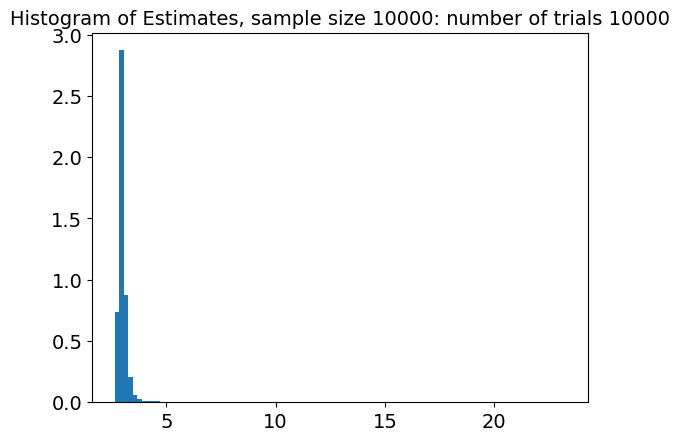

In [14]:
nsamples = 10000
ntrials = 10000
estimates = np.zeros((ntrials))

for ii in range(ntrials):
    estimate, samples, evaluations = monte_carlo(nsamples, sampler, g)
    estimates[ii] = estimate
    if ii % 1000 == 0:
        print("Trial {0}: estimated integral {1}".format(ii, estimates[ii]))

fig, axs = plt.subplots(1)
axs.hist(estimates, bins=100, density=True)
#axs.axvline(x=int_numeric, linewidth=6, color='red')
axs.set_title("Histogram of Estimates, sample size 10000: number of trials 10000", fontsize=14)
plt.show()

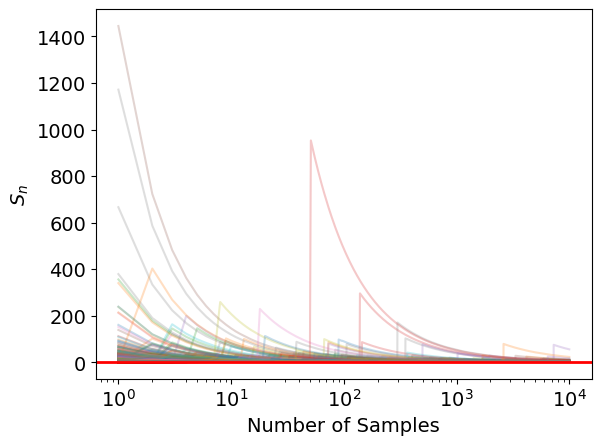

In [15]:
ntrials = 10000
nsamples = 10000
estimate_vals = np.zeros((ntrials, nsamples))
plt.figure()
for ii in range(ntrials):
    estimate, samples, evaluations = monte_carlo(nsamples, sampler, g, cumsum=True)
    estimate_vals[ii, :] = estimate 
    plt.semilogx(np.arange(1, nsamples+1), estimate_vals[ii, :], '-', alpha=0.25)
plt.axhline(y=3, color='red', linewidth=2)
plt.xlabel('Number of Samples')
plt.ylabel(r'$S_n$')
plt.show()

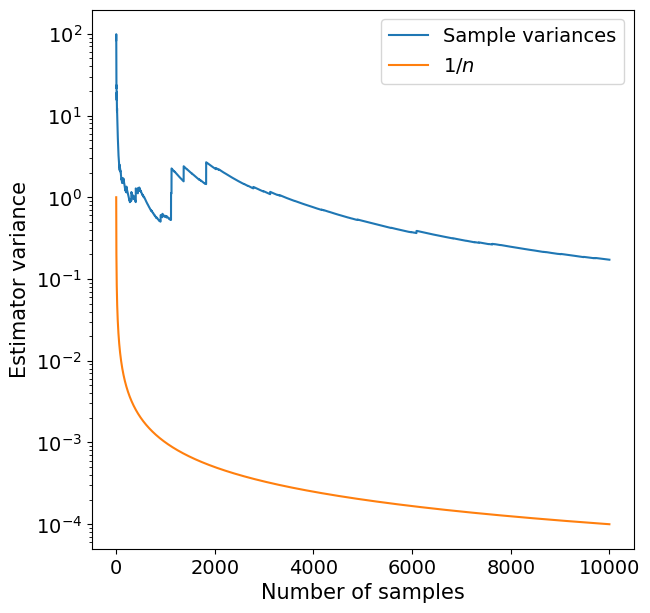

In [8]:
plt.figure(figsize=(7,7))
variances = np.var(estimate_vals, axis=0) # variance of the histogram at each $n$
plt.semilogy(np.arange(1, variances.shape[0]+1), variances, label='Sample variances')
plt.semilogy(np.arange(1, variances.shape[0]+1), 1/(np.arange(1, variances.shape[0]+1)), label=r'$1/n$')
plt.ylabel('Estimator variance', fontsize=15)
plt.xlabel('Number of samples', fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()